# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import itertools

# 設定 GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [8]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________

196/196 [==============================] - 3s 15ms/step - loss: 2.3070 - accuracy: 0.1007 - val_loss: 2.3172 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 2.3078 - accuracy: 0.1005 - val_loss: 2.3083 - val_accuracy: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__

196/196 [==============================] - 2s 11ms/step - loss: 2.3062 - accuracy: 0.1014 - val_loss: 2.3070 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3066 - accuracy: 0.0986 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 2.3063 - accuracy: 0.1012 - val_loss: 2.3086 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3070 - accuracy: 0.0995 - val_loss: 2.3092 - val_accuracy: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512

196/196 [==============================] - 3s 15ms/step - loss: 1.8268 - accuracy: 0.3179 - val_loss: 1.8337 - val_accuracy: 0.3090
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8262 - accuracy: 0.3190 - val_loss: 1.8879 - val_accuracy: 0.2975
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8352 - accuracy: 0.3169 - val_loss: 1.8162 - val_accuracy: 0.3244
Epoch 48/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8281 - accuracy: 0.3168 - val_loss: 1.8889 - val_accuracy: 0.3010
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8285 - accuracy: 0.3168 - val_loss: 1.8122 - val_accuracy: 0.3160
Epoch 50/50
196/196 [==============================] - 3s 15ms/step - loss: 1.8282 - accuracy: 0.3171 - val_loss: 1.8547 - val_accuracy: 0.3013
Experiment with LR = 0.010000, Optimizer = <class 'tensorflow.python.keras.optimizer_v2.adagrad.Adagrad'>
Model: "functional_1"
____________________

196/196 [==============================] - 2s 11ms/step - loss: 1.4599 - accuracy: 0.4772 - val_loss: 1.6015 - val_accuracy: 0.4341
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4700 - accuracy: 0.4737 - val_loss: 1.5606 - val_accuracy: 0.4456
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4690 - accuracy: 0.4759 - val_loss: 1.6195 - val_accuracy: 0.4204
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4655 - accuracy: 0.4773 - val_loss: 1.5507 - val_accuracy: 0.4511
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4579 - accuracy: 0.4778 - val_loss: 1.5989 - val_accuracy: 0.4408
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4670 - accuracy: 0.4747 - val_loss: 1.6586 - val_accuracy: 0.4248
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4490 - accuracy: 0.4805 - val_loss: 1.5382 - val_accuracy: 0.4575
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 0.8850 - accuracy: 0.6831 - val_loss: 1.7814 - val_accuracy: 0.4816
Epoch 42/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8706 - accuracy: 0.6883 - val_loss: 1.7087 - val_accuracy: 0.4913
Epoch 43/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8600 - accuracy: 0.6914 - val_loss: 1.8388 - val_accuracy: 0.4772
Epoch 44/50
196/196 [==============================] - 3s 15ms/step - loss: 0.8464 - accuracy: 0.6960 - val_loss: 1.8235 - val_accuracy: 0.4925
Epoch 45/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8361 - accuracy: 0.6988 - val_loss: 1.7916 - val_accuracy: 0.4889
Epoch 46/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8215 - accuracy: 0.7041 - val_loss: 1.9328 - val_accuracy: 0.4769
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 0.8104 - accuracy: 0.7077 - val_loss: 1.7938 - val_accuracy: 0.5042
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 0.7796 - accuracy: 0.7216 - val_loss: 1.5619 - val_accuracy: 0.5223
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7697 - accuracy: 0.7251 - val_loss: 1.6168 - val_accuracy: 0.5071
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7531 - accuracy: 0.7323 - val_loss: 1.6337 - val_accuracy: 0.5197
Epoch 42/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7440 - accuracy: 0.7341 - val_loss: 1.6680 - val_accuracy: 0.5154
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7200 - accuracy: 0.7446 - val_loss: 1.7026 - val_accuracy: 0.5127
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7092 - accuracy: 0.7465 - val_loss: 1.7364 - val_accuracy: 0.5177
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6957 - accuracy: 0.7531 - val_loss: 1.7048 - val_accuracy: 0.5179
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 1.0663 - accuracy: 0.6309 - val_loss: 1.4772 - val_accuracy: 0.4876
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0561 - accuracy: 0.6326 - val_loss: 1.5169 - val_accuracy: 0.4857
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0436 - accuracy: 0.6348 - val_loss: 1.4344 - val_accuracy: 0.5103
Epoch 40/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0355 - accuracy: 0.6382 - val_loss: 1.3932 - val_accuracy: 0.5236
Epoch 41/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0225 - accuracy: 0.6444 - val_loss: 1.4240 - val_accuracy: 0.5082
Epoch 42/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0140 - accuracy: 0.6489 - val_loss: 1.4671 - val_accuracy: 0.4906
Epoch 43/50
196/196 [==============================] - 3s 16ms/step - loss: 1.0006 - accuracy: 0.6531 - val_loss: 1.3562 - val_accuracy: 0.5323
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 0.9851 - accuracy: 0.6560 - val_loss: 1.3387 - val_accuracy: 0.5381
Epoch 36/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9790 - accuracy: 0.6595 - val_loss: 1.3384 - val_accuracy: 0.5377
Epoch 37/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9683 - accuracy: 0.6627 - val_loss: 1.4009 - val_accuracy: 0.5228
Epoch 38/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9511 - accuracy: 0.6723 - val_loss: 1.3115 - val_accuracy: 0.5429
Epoch 39/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9297 - accuracy: 0.6780 - val_loss: 1.3215 - val_accuracy: 0.5404
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9229 - accuracy: 0.6805 - val_loss: 1.3241 - val_accuracy: 0.5407
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9094 - accuracy: 0.6869 - val_loss: 1.3560 - val_accuracy: 0.5310
Epoc

196/196 [==============================] - 3s 16ms/step - loss: 1.4874 - accuracy: 0.4854 - val_loss: 1.5238 - val_accuracy: 0.4643
Epoch 34/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4820 - accuracy: 0.4850 - val_loss: 1.5279 - val_accuracy: 0.4606
Epoch 35/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4767 - accuracy: 0.4902 - val_loss: 1.5195 - val_accuracy: 0.4594
Epoch 36/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4712 - accuracy: 0.4922 - val_loss: 1.5234 - val_accuracy: 0.4532
Epoch 37/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4657 - accuracy: 0.4915 - val_loss: 1.5149 - val_accuracy: 0.4659
Epoch 38/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4610 - accuracy: 0.4953 - val_loss: 1.5143 - val_accuracy: 0.4672
Epoch 39/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4560 - accuracy: 0.4955 - val_loss: 1.5073 - val_accuracy: 0.4703
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.4551 - accuracy: 0.4968 - val_loss: 1.4937 - val_accuracy: 0.4769
Epoch 32/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4496 - accuracy: 0.4985 - val_loss: 1.4891 - val_accuracy: 0.4784
Epoch 33/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4428 - accuracy: 0.5008 - val_loss: 1.4830 - val_accuracy: 0.4792
Epoch 34/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4378 - accuracy: 0.5023 - val_loss: 1.4800 - val_accuracy: 0.4813
Epoch 35/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4326 - accuracy: 0.5037 - val_loss: 1.4765 - val_accuracy: 0.4831
Epoch 36/50
196/196 [==============================] - 3s 13ms/step - loss: 1.4269 - accuracy: 0.5084 - val_loss: 1.4742 - val_accuracy: 0.4803
Epoch 37/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4211 - accuracy: 0.5075 - val_loss: 1.4674 - val_accuracy: 0.4858
Epoc

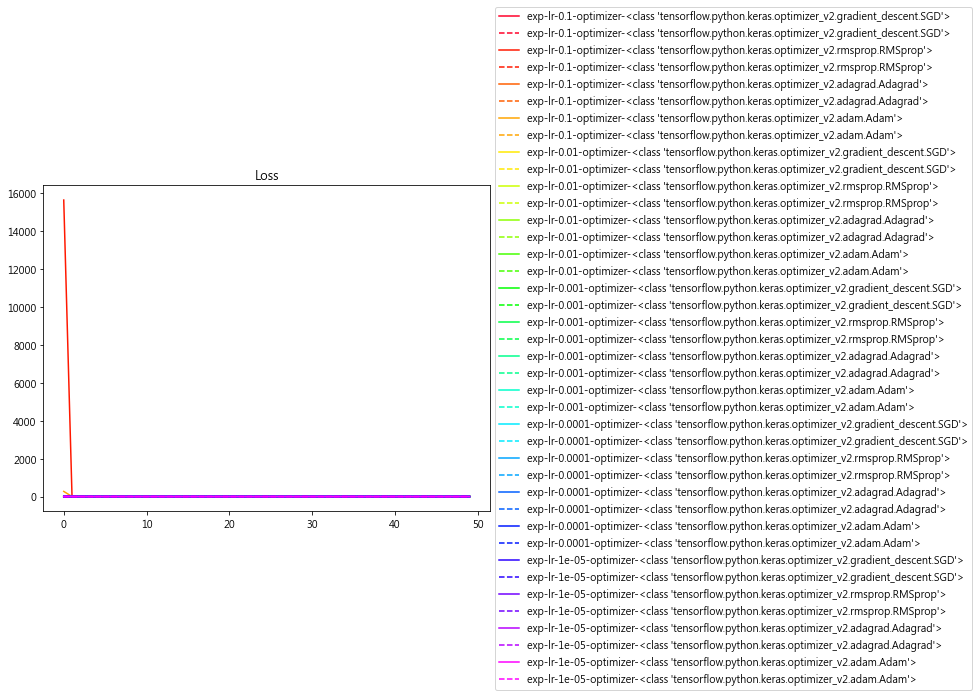

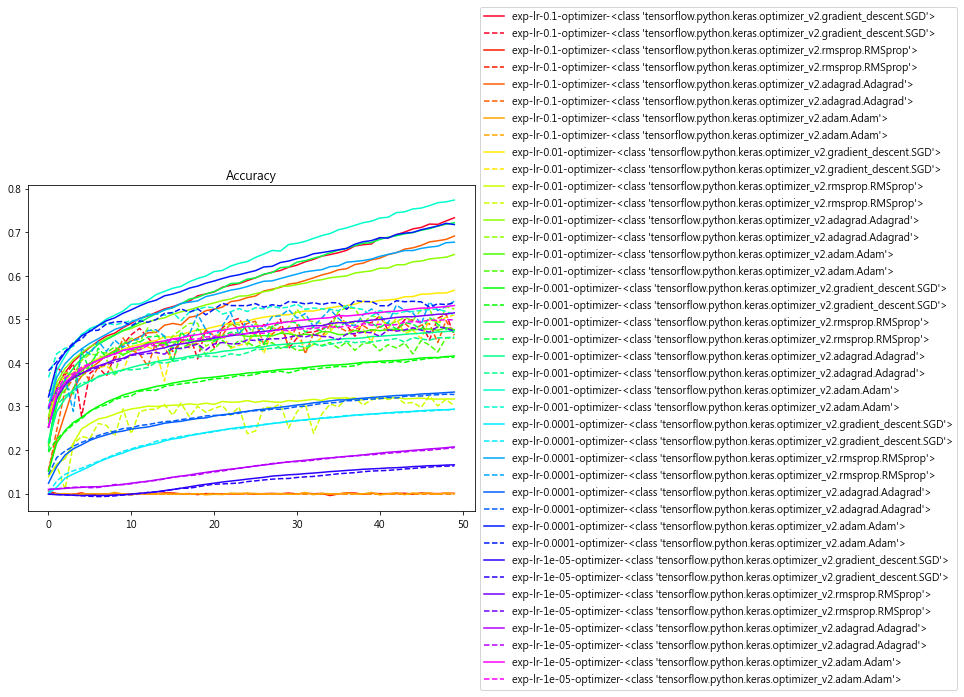

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()